In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('natural-gas-consumption-by-zip-code-2010.csv')

In [3]:
df.head()

,Zip Code,Building type,Consumption (therms),Consumption (GJ),Source,Longitude,Latitude
0,10300,Commercial,470.0,50.0,National Grid,NaN,NaN
1,10335,Commercial,647.0,68.0,National Grid,NaN,NaN
2,10360,Large Residential,33762.0,3562.0,National Grid,NaN,NaN
3,11200,Commercial,32125.0,3389.0,National Grid,NaN,NaN
4,11200,Institutional,3605.0,380.0,National Grid,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1005 non-null   float64
 3   Consumption (GJ)      1005 non-null   float64
 4   Source                1015 non-null   object 
 5   Longitude             964 non-null    float64
 6   Latitude              964 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.6+ KB


In [5]:
def fillColumnByAnother(data,source_col,dest_col):
    """Fills a missing value from a feature based on average of another feature"""
    dict_from_source = dict()
    keys = data[source_col].unique().tolist()
    for k in keys:
        dict_from_source[k] = data[data[source_col] == k][dest_col].mean()
        data.loc[(data[source_col] == k) & (data[dest_col].isna()),dest_col] = dict_from_source.get(k)
    print(data.info())

In [6]:
fillColumnByAnother(df,'Building type','Consumption (therms)')
fillColumnByAnother(df,'Building type','Consumption (GJ)')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1015 non-null   float64
 3   Consumption (GJ)      1005 non-null   float64
 4   Source                1015 non-null   object 
 5   Longitude             964 non-null    float64
 6   Latitude              964 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1015 non-null   float64
 3   C

In [7]:
df.isna().sum()

Zip Code                 0
Building type            0
Consumption (therms)     0
Consumption (GJ)         0
Source                   0
Longitude               51
Latitude                51
dtype: int64

In [8]:
cont_cols = df.describe().columns.tolist()
df_copy = df[cont_cols]
cont_cols

['Zip Code',
 'Consumption (therms)',
 'Consumption (GJ)',
 'Longitude',
 'Latitude']

In [9]:
df.corr()

,Zip Code,Consumption (therms),Consumption (GJ),Longitude,Latitude
Zip Code,1.000000,0.028498,0.028498,-0.372297,0.568882
Consumption (therms),0.028498,1.000000,1.000000,-0.138655,-0.094580
Consumption (GJ),0.028498,1.000000,1.000000,-0.138655,-0.094580
Longitude,-0.372297,-0.138655,-0.138655,1.000000,0.345145
Latitude,0.568882,-0.094580,-0.094580,0.345145,1.000000


In [10]:
coor_dfs = pd.read_csv('US Zip Codes from 2013 Government Data.csv')
coor_dfs.head()
coor_dfs_wip = coor_dfs.copy()

In [11]:
coor_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZIP     33144 non-null  int64  
 1   LAT     33144 non-null  float64
 2   LNG     33144 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 776.9 KB


In [12]:
df_wip = df.copy()

In [13]:
missing_zips = df[(df['Longitude'].isna()) & (df['Latitude'].isna())]['Zip Code'].tolist()
coor_dfs.set_index('ZIP',inplace=True)
zip_dict = dict()
for z in missing_zips:
    zip_dict[z] = coor_dfs.iloc[z]['LAT'], coor_dfs.iloc[z]['LNG']
    
for zkey in zip_dict.keys():
    df.loc[df['Zip Code'] == zkey,'Latitude'] = zip_dict[zkey][0]
    df.loc[df['Zip Code'] == zkey,'Longitude'] = zip_dict[zkey][1]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1015 non-null   float64
 3   Consumption (GJ)      1015 non-null   float64
 4   Source                1015 non-null   object 
 5   Longitude             1015 non-null   float64
 6   Latitude              1015 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.6+ KB


## Another Approach

In [15]:
df_wip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1015 non-null   float64
 3   Consumption (GJ)      1015 non-null   float64
 4   Source                1015 non-null   object 
 5   Longitude             964 non-null    float64
 6   Latitude              964 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.6+ KB


In [16]:
coor_dfs_wip.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [17]:
df_wip.head()

,Zip Code,Building type,Consumption (therms),Consumption (GJ),Source,Longitude,Latitude
0,10300,Commercial,470.0,50.0,National Grid,NaN,NaN
1,10335,Commercial,647.0,68.0,National Grid,NaN,NaN
2,10360,Large Residential,33762.0,3562.0,National Grid,NaN,NaN
3,11200,Commercial,32125.0,3389.0,National Grid,NaN,NaN
4,11200,Institutional,3605.0,380.0,National Grid,NaN,NaN


In [18]:
all_df = df_wip.merge(coor_dfs_wip,left_on='Zip Code', right_on='ZIP',suffixes=['_org','_seq'])
all_df.head()

,Zip Code,Building type,Consumption (therms),Consumption (GJ),Source,Longitude,Latitude,ZIP,LAT,LNG
0,10007,Residential,12845.0,1355.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
1,10007,Commercial,1220273.0,128746.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
2,10007,Large Residential,12021.0,1268.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
3,10007,Commercial,981522.0,103556.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
4,10007,Residential,605082.0,63840.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755


In [19]:
check_df = all_df[all_df['Zip Code'] == all_df['ZIP']]
check_df

,Zip Code,Building type,Consumption (therms),Consumption (GJ),Source,Longitude,Latitude,ZIP,LAT,LNG
0,10007,Residential,12845.0,1355.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
1,10007,Commercial,1220273.0,128746.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
2,10007,Large Residential,12021.0,1268.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
3,10007,Commercial,981522.0,103556.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
4,10007,Residential,605082.0,63840.0,ConEd,40.713631,-74.009131,10007,40.713848,-74.007755
...,...,...,...,...,...,...,...,...,...,...
943,11379,Commercial,1248717.0,131747.0,National Grid,40.716798,-73.879334,11379,40.716748,-73.879601
944,11379,Large Residential,659949.0,69628.0,National Grid,40.716798,-73.879334,11379,40.716748,-73.879601
945,10311,Commercial,55290.0,5833.0,National Grid,40.607541,-74.171059,10311,40.605241,-74.179503
946,10311,Institutional,18255.0,1926.0,National Grid,40.607541,-74.171059,10311,40.605241,-74.179503


In [20]:
check_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 947
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              948 non-null    int64  
 1   Building type         948 non-null    object 
 2   Consumption (therms)  948 non-null    float64
 3   Consumption (GJ)      948 non-null    float64
 4   Source                948 non-null    object 
 5   Longitude             948 non-null    float64
 6   Latitude              948 non-null    float64
 7   ZIP                   948 non-null    int64  
 8   LAT                   948 non-null    float64
 9   LNG                   948 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 81.5+ KB


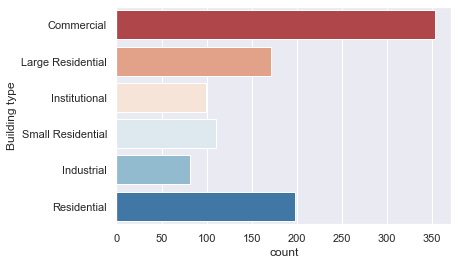

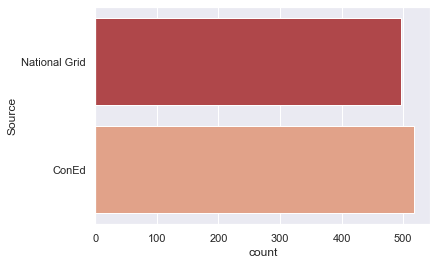

In [96]:
CAT_COLS = df.describe(include='O').columns.tolist()
for col in CAT_COLS:
    sns.countplot(y=df[col])
    plt.show()

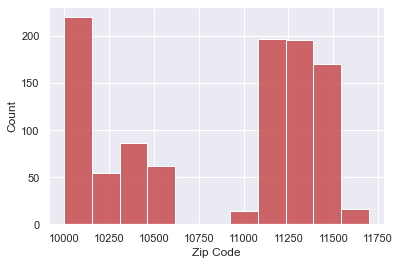

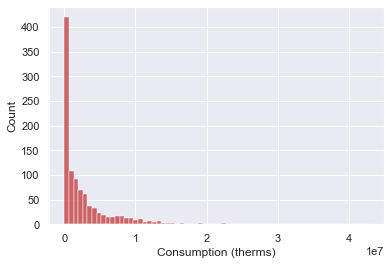

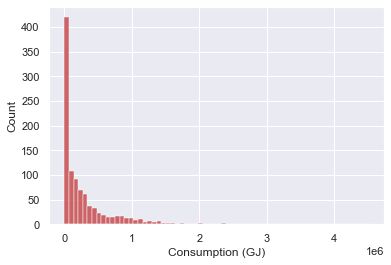

In [97]:
CONT_COLS = df.describe().columns.tolist()
for col in CONT_COLS:
    if not col in ['Longitude','Latitude']:
        sns.histplot(df[col])
        plt.show()

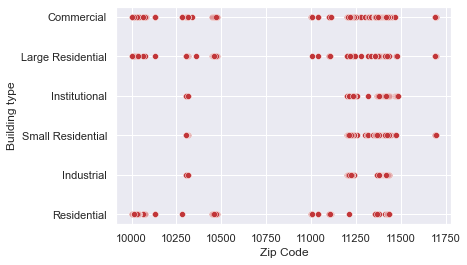

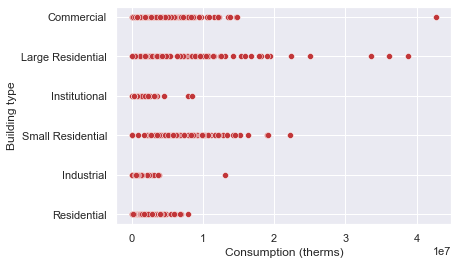

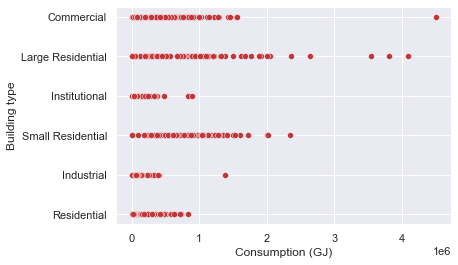

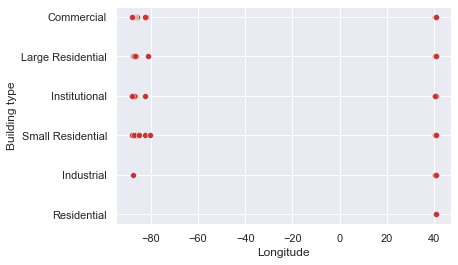

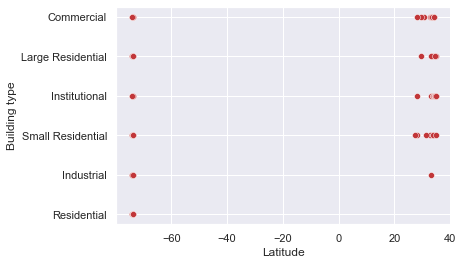

In [98]:
for col in CONT_COLS:
    sns.scatterplot(x=df[col],y=df['Building type'])
    plt.show()

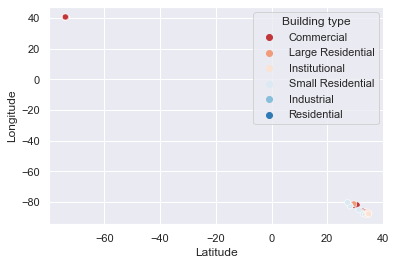

In [99]:
sns.scatterplot(x='Latitude',y='Longitude', data = df,hue='Building type')
plt.show()

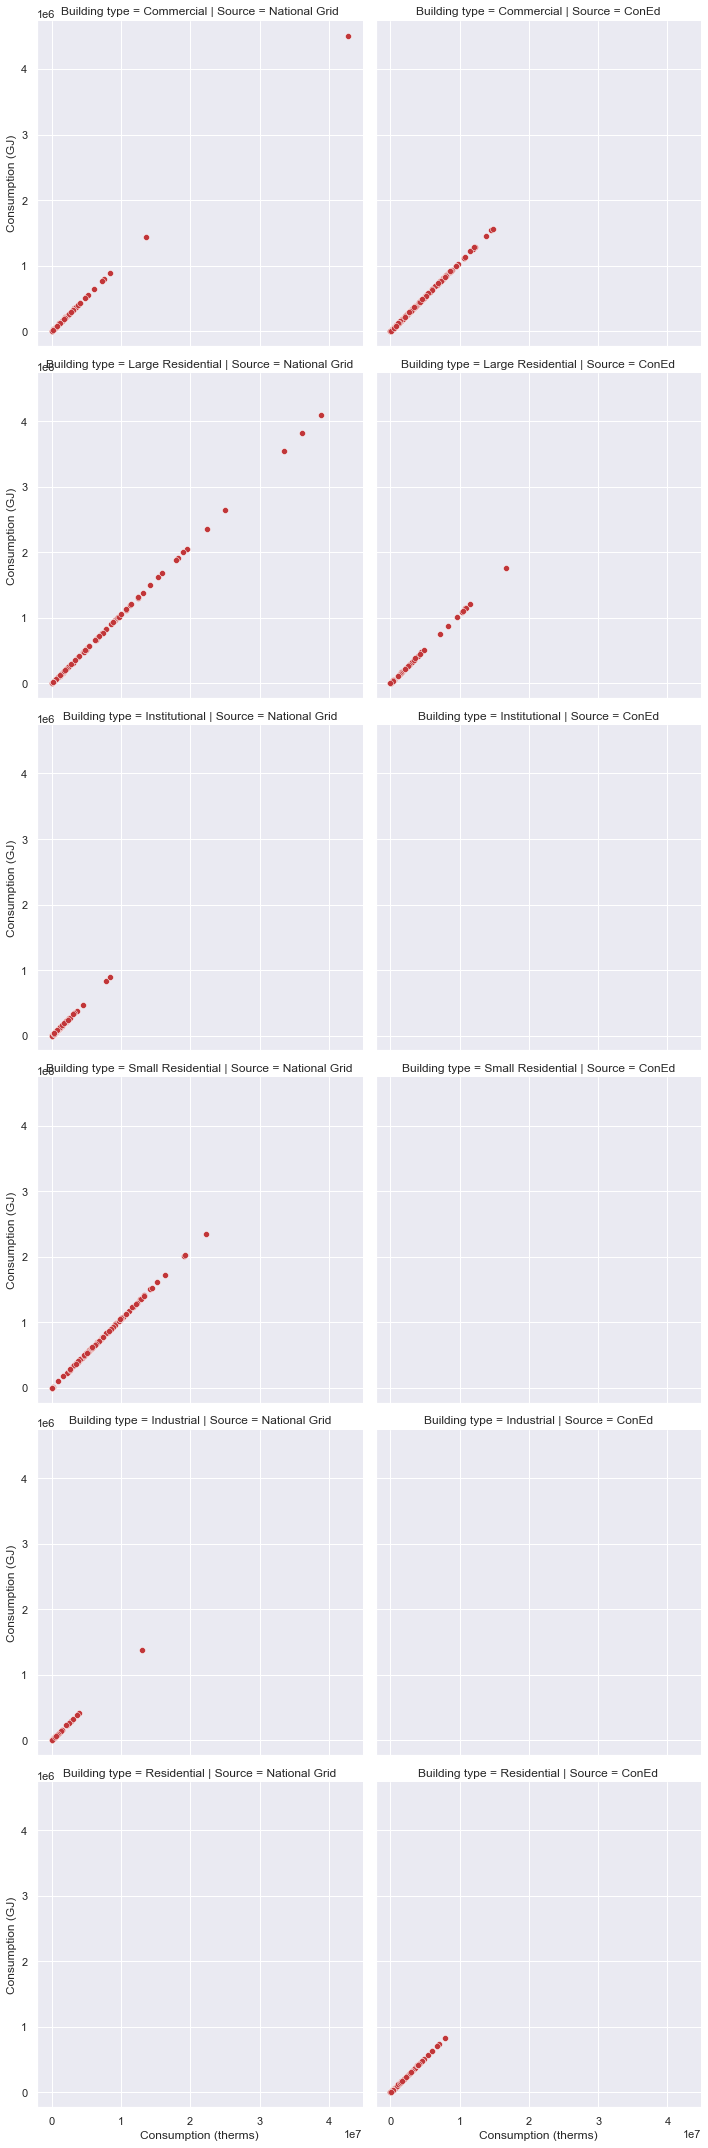

In [100]:
sns.relplot(x='Consumption (therms)',y='Consumption (GJ)',data=df,kind='scatter',col='Source',row='Building type')
plt.show()

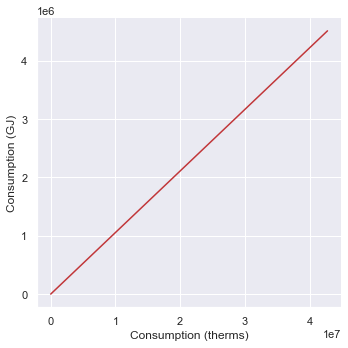

In [101]:
sns.relplot(x='Consumption (therms)',y='Consumption (GJ)',data=df,kind='line')
plt.show()

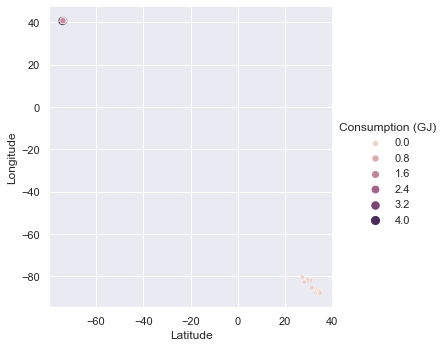

In [102]:
sns.relplot(x='Latitude',y='Longitude',data=df,kind='scatter',hue='Consumption (GJ)',size='Consumption (GJ)')
plt.show()

In [52]:
df.describe()

,Zip Code,Consumption (therms),Consumption (GJ),Longitude,Latitude
count,1015.000000,1.015000e+03,1.015000e+03,1015.000000,1015.000000
mean,10858.175369,2.750340e+06,2.901763e+05,34.338762,-68.533518
std,570.694259,4.277279e+06,4.512769e+05,27.793092,23.399494
min,10001.000000,1.000000e+00,0.000000e+00,-88.095624,-74.242114
25%,10305.500000,1.683395e+05,1.776050e+04,40.665557,-73.972976
50%,11209.000000,1.178667e+06,1.243559e+05,40.721453,-73.912985
75%,11368.000000,3.440209e+06,3.629610e+05,40.772398,-73.824955
max,11697.000000,4.274765e+07,4.510117e+06,40.901994,34.954456


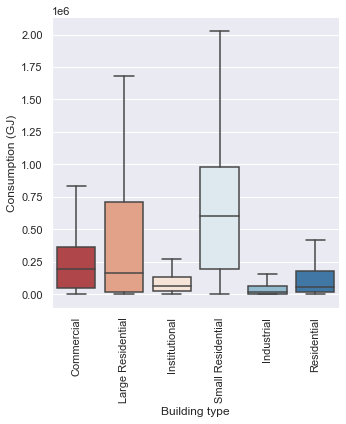

In [94]:
sns.catplot(x='Building type',y='Consumption (GJ)',data=df,kind='box',sym='')
plt.xticks(rotation=90)
plt.show()

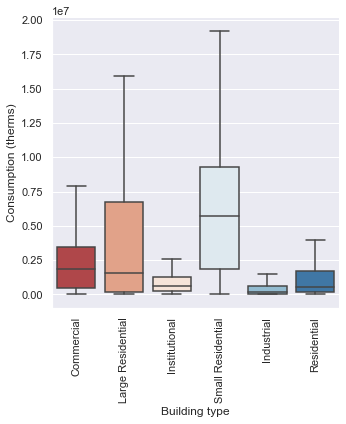

In [93]:
g = sns.catplot(x='Building type',y='Consumption (therms)',data=df,kind='box',sym='')
plt.xticks(rotation=90)
plt.show()

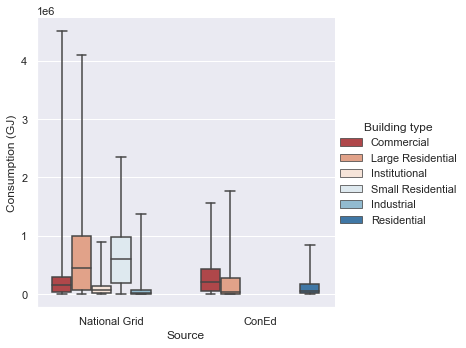

In [95]:
sns.catplot(x='Source',y='Consumption (GJ)',data=df,kind='box',whis=[0,100],hue='Building type')
plt.show()

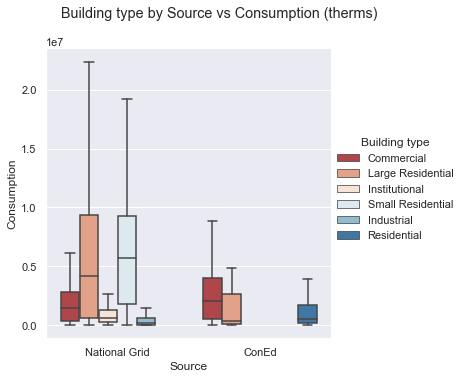

In [90]:
sns.set_context('notebook')
sns.set_palette('RdBu')
sns.set_style('darkgrid')
g = sns.catplot(x='Source',y='Consumption (therms)',data=df,kind='box',sym='',hue='Building type')
g.fig.suptitle('Building type by Source vs Consumption (therms)',y=1.05)
g.set(xlabel='Source',ylabel='Consumption')
plt.show()